<a href="https://colab.research.google.com/github/smazepaa/loan-prediction/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Status Prediction

## Importing the Dependencies

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import operator
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [ ]:
#!pip install keras
#!pip install tensorflow --upgrade

## Preparing the Dataset

In [ ]:
file_url = 'https://drive.google.com/uc?id=1LB9NWKfNx0rMpoG_p5ivLpHtiTe5Ew3I'
df = pd.read_csv(file_url)

In [ ]:
df.replace({'Yes': 1, 'No': 0, 'Y': 1, 'N': 0}, inplace=True)
df.drop(columns=['Property_Area', 'Loan_ID'], axis=1, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Dependents'] = df['Dependents'].str.replace('+', '', regex=False)

In [ ]:
df = df.astype('float32')
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,1.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,1.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,1.0
5,1.0,1.0,2.0,1.0,1.0,5417.0,4196.0,267.0,360.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.0,360.0,1.0,1.0
610,1.0,1.0,3.0,1.0,0.0,4106.0,0.0,40.0,180.0,1.0,1.0
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.0,360.0,1.0,1.0
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.0,360.0,1.0,1.0


In [ ]:
df.to_csv('loans_data.csv', index=False)

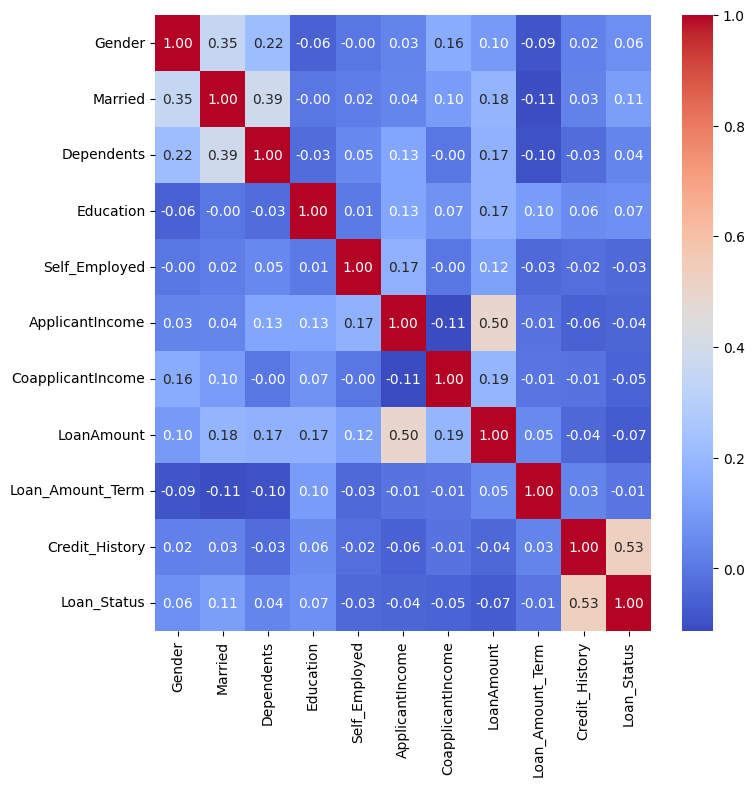

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## Splitting the Dataset

In [ ]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

## Decision Tree

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

acc = accuracy_score(y_test, y_pred)*100
print ('Decision Tree Accuracy: {}%'.format(round(acc,2)))

Decision Tree Accuracy: 72.22%


In [ ]:
columns = X_train.columns.values
importance = tree.feature_importances_
c_imp = {}

for col,imp in zip(columns, importance):
    c_imp[col] = imp

print("Feature importances")
for col, imp in reversed(sorted(c_imp.items(), key=operator.itemgetter(1))):
    print(col,':',imp)

Feature importances
ApplicantIncome : 0.25500627662730735
LoanAmount : 0.2327774985538591
Credit_History : 0.2245910237329553
CoapplicantIncome : 0.11096039412328515
Loan_Amount_Term : 0.04383655402626445
Dependents : 0.03649486049385008
Education : 0.026511967835563244
Married : 0.026251742669317544
Self_Employed : 0.025893608593836263
Gender : 0.017676073343761464


In [ ]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted False','Predicted True'],
    index=['Labeled False','Labeled True']
)

,Predicted False,Predicted True
Labeled False,29,22
Labeled True,18,75


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.57      0.59        51
         1.0       0.77      0.81      0.79        93

    accuracy                           0.72       144
   macro avg       0.70      0.69      0.69       144
weighted avg       0.72      0.72      0.72       144



## PCA

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

tree_pca = DecisionTreeClassifier(criterion='entropy')

tree_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = tree_pca.predict(X_test_pca)

acc = accuracy_score(y_test, y_pred_pca)*100
print ('Decision Tree Accuracy: {}%'.format(round(acc,2)))

Decision Tree Accuracy: 61.81%


In [ ]:
print(classification_report(y_test_pca, y_pred_pca))

              precision    recall  f1-score   support

         0.0       0.40      0.27      0.32        44
         1.0       0.72      0.82      0.77       100

    accuracy                           0.65       144
   macro avg       0.56      0.55      0.55       144
weighted avg       0.62      0.65      0.63       144



In [ ]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_pca),
    columns=['Predicted False','Predicted True'],
    index=['Labeled False','Labeled True']
)

,Predicted False,Predicted True
Labeled False,13,38
Labeled True,17,76


## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=1)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.7430555555555556


In [ ]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_rf),
    columns=['Predicted False','Predicted True'],
    index=['Labeled False','Labeled True']
)

,Predicted False,Predicted True
Labeled False,23,28
Labeled True,9,84


In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.72      0.45      0.55        51
         1.0       0.75      0.90      0.82        93

    accuracy                           0.74       144
   macro avg       0.73      0.68      0.69       144
weighted avg       0.74      0.74      0.73       144



In [ ]:
# Perform 10-fold cross-validation
scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')

print("Accuracies for each fold:", scores)

# Print the mean accuracy and the 95% confidence interval of the score estimate
print("Mean Accuracy: %0.2f (± %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracies for each fold: [0.79166667 0.79166667 0.75       0.79166667 0.75       0.83333333
 0.83333333 0.83333333 0.8125     0.83333333]
Mean Accuracy: 0.80 (± 0.06)


## Neural Networks

### Sigmoid with 3 Layers

In [ ]:
model = Sequential()

model.add(Dense(units=100, activation='sigmoid', input_dim=X_train.shape[1]))
model.add(Dense(units=50, activation='sigmoid', input_dim=X_train.shape[1]))

model.add(Dense(units=1, activation='sigmoid'))

sgd = optimizers.SGD(learning_rate=1)

model.compile(loss='mean_squared_error', optimizer=sgd)

model.fit(X_train, y_train, epochs=100, verbose=False)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Sigmoid: {mse}')

5/5 [==============================] - 0s 6ms/step
Mean Squared Error for Sigmoid: 0.22719182074069977


In [ ]:
y_pred_labels = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

         0.0       0.50      0.02      0.04        51
         1.0       0.65      0.99      0.78        93

    accuracy                           0.65       144
   macro avg       0.57      0.50      0.41       144
weighted avg       0.60      0.65      0.52       144



### Scaled Sigmoid

In [ ]:
model_scaled = Sequential()
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler_y = MinMaxScaler()

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

model_scaled.add(Dense(units=100, activation='sigmoid', input_dim=X_train.shape[1]))
model_scaled.add(Dense(units=50, activation='sigmoid', input_dim=X_train.shape[1]))

model_scaled.add(Dense(units=1, activation='sigmoid'))

sgd = optimizers.SGD(learning_rate=1)

model_scaled.compile(loss='mean_squared_error', optimizer=sgd)

model_scaled.fit(X_train_scaled, y_train_scaled, epochs=100, verbose=False)

y_pred = model_scaled.predict(X_test_scaled)

mse = mean_squared_error(y_test_scaled, y_pred)
print(f'Mean Squared Error with Scaler: {mse}')

5/5 [==============================] - 0s 4ms/step
Mean Squared Error with Scaler: 0.17776353657245636


In [ ]:
y_pred_labels = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

         0.0       0.91      0.41      0.57        51
         1.0       0.75      0.98      0.85        93

    accuracy                           0.78       144
   macro avg       0.83      0.70      0.71       144
weighted avg       0.81      0.78      0.75       144



### Sigmoid with 5 Layers

In [ ]:
lyrd_model = Sequential()

lyrd_model.add(Dense(units=300, activation='sigmoid', input_dim=X_train.shape[1]))
lyrd_model.add(Dense(units=200, activation='sigmoid', input_dim=X_train.shape[1]))
lyrd_model.add(Dense(units=100, activation='sigmoid', input_dim=X_train.shape[1]))
lyrd_model.add(Dense(units=50, activation='sigmoid', input_dim=X_train.shape[1]))

lyrd_model.add(Dense(units=1, activation='sigmoid'))

sgd = optimizers.SGD(learning_rate=1)

lyrd_model.compile(loss='mean_squared_error', optimizer=sgd)

lyrd_model.fit(X_train, y_train, epochs=100, verbose=False)

y_pred = lyrd_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error with 5 Layers: {mse}')

5/5 [==============================] - 0s 3ms/step
Mean Squared Error with 5 Layers: 0.23839256167411804


In [ ]:
y_pred_labels = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        51
         1.0       0.65      1.00      0.78        93

    accuracy                           0.65       144
   macro avg       0.32      0.50      0.39       144
weighted avg       0.42      0.65      0.51       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ReLu

In [ ]:
relu_model = Sequential()

relu_model.add(Dense(units=100, activation='relu', input_dim=X_train.shape[1]))
relu_model.add(Dense(units=50, activation='relu', input_dim=X_train.shape[1]))
relu_model.add(Dense(units=1, activation='sigmoid'))

sgd = optimizers.SGD(learning_rate=1)

relu_model.compile(loss='mean_squared_error', optimizer=sgd)

relu_model.fit(X_train, y_train, epochs=100, verbose=False)

y_pred = relu_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for ReLu: {mse}')

5/5 [==============================] - 0s 3ms/step
Mean Squared Error for ReLu: 0.3541666567325592


In [ ]:
y_pred_labels = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        51
         1.0       0.65      1.00      0.78        93

    accuracy                           0.65       144
   macro avg       0.32      0.50      0.39       144
weighted avg       0.42      0.65      0.51       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ReLu With Lower LR

In [ ]:
lower_relu = Sequential()

lower_relu.add(Dense(units=100, activation='relu', input_dim=X_train.shape[1]))
lower_relu.add(Dense(units=50, activation='relu', input_dim=X_train.shape[1]))
lower_relu.add(Dense(units=1, activation='sigmoid'))

sgd_lower = optimizers.SGD(learning_rate=0.01)
lower_relu.compile(loss='mean_squared_error', optimizer=sgd_lower)

lower_relu.fit(X_train, y_train, epochs=100, verbose=False)

y_pred = lower_relu.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error with Lower Learning Rate: {mse}')

5/5 [==============================] - 0s 3ms/step
Mean Squared Error with Lower Learning Rate: 0.3541666567325592


In [ ]:
y_pred_labels = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        51
         1.0       0.65      1.00      0.78        93

    accuracy                           0.65       144
   macro avg       0.32      0.50      0.39       144
weighted avg       0.42      0.65      0.51       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Support Vector Machine

### Linear Kernel

In [ ]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)

predictions_linear = svc_linear.predict(X_test)
print("Classification Report for Linear Model")
print(classification_report(y_test, predictions_linear))

Classification Report for Linear Model
              precision    recall  f1-score   support

         0.0       0.84      0.31      0.46        51
         1.0       0.72      0.97      0.83        93

    accuracy                           0.74       144
   macro avg       0.78      0.64      0.64       144
weighted avg       0.76      0.74      0.70       144



### RBF Kernel

In [ ]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)

predictions_rbf = svc_rbf.predict(X_test)
print("Classification Report for RBF Model")
print(classification_report(y_test, predictions_rbf))

Classification Report for RBF Model
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        51
         1.0       0.64      0.98      0.77        93

    accuracy                           0.63       144
   macro avg       0.32      0.49      0.39       144
weighted avg       0.41      0.63      0.50       144



## Testing with an Example

In [ ]:
new_instance = {
    'Gender': 1.0,
    'Married': 1.0,
    'Dependents': 0.0,
    'Education': 1.0,
    'Self_Employed': 0.0,
    'ApplicantIncome': 5720.0,
    'CoapplicantIncome': 0.0,
    'LoanAmount': 110.0,
    'Loan_Amount_Term': 360.0,
    'Credit_History': 1.0
}

new_instance_df = pd.DataFrame([new_instance])

In [ ]:
def is_approved(predicted_val):
  if 0.5 < predicted_val <= 1:
    return "Approved"
  else:
    return "Not Approved"

### Desicion Tree

In [ ]:
prediction = tree.predict(new_instance_df)
prediction_prob = tree.predict_proba(new_instance_df)

predicted_outcome = is_approved(prediction[0])

print("Predicted Outcome (Desicion Tree):", predicted_outcome)
print(prediction_prob, prediction)

Predicted Outcome (Desicion Tree): Approved
[[0. 1.]] [1.]


### Random Forest

In [ ]:
prediction = rf.predict(new_instance_df)
prediction_prob = rf.predict_proba(new_instance_df)

predicted_outcome = is_approved(prediction[0])

print("Predicted Outcome (Random Forest):", predicted_outcome)
print(prediction_prob, prediction)

Predicted Outcome (Random Forest): Approved
[[0.09 0.91]] [1.]


### Neural Networks

#### Sigmoid

In [ ]:
y_pred = model.predict(new_instance_df)

predicted_outcome = is_approved(y_pred)

print("Predicted Outcome (3-layer Sigmoid):", predicted_outcome)
print(y_pred)

1/1 [==============================] - 0s 93ms/step
Predicted Outcome (3-layer Sigmoid): Approved
[[0.64184976]]


In [ ]:
inst_normalised=scaler.fit_transform(new_instance_df)

y_pred = model.predict(inst_normalised).reshape(-1, 1)
y_rescaled = scaler_y.inverse_transform(y_pred)
predicted_outcome = is_approved(y_rescaled)

print("Predicted Outcome (Scaled Sigmoid):", predicted_outcome)
print(y_rescaled)

1/1 [==============================] - 0s 37ms/step
Predicted Outcome (Scaled Sigmoid): Approved
[[0.5222917]]


In [ ]:
y_pred = lyrd_model.predict(new_instance_df)

predicted_outcome = is_approved(y_pred)

print("Predicted Outcome (5-layer Sigmoid):", predicted_outcome)
print(y_pred)

1/1 [==============================] - 0s 111ms/step
Predicted Outcome (5-layer Sigmoid): Approved
[[0.73812246]]


#### ReLu

In [ ]:
y_pred = relu_model.predict(new_instance_df)

predicted_outcome = is_approved(y_pred)

print("Predicted Outcome (ReLu):", predicted_outcome)
print(y_pred)

1/1 [==============================] - 0s 95ms/step
Predicted Outcome (ReLu): Approved
[[1.]]


In [ ]:
y_pred = lower_relu.predict(new_instance_df)

predicted_outcome = is_approved(y_pred)

print("Predicted Outcome (ReLu with Lower LR):", predicted_outcome)
print(y_pred)

1/1 [==============================] - 0s 93ms/step
Predicted Outcome (ReLu with Lower LR): Approved
[[1.]]


### SVM

In [ ]:
y_pred = svc_linear.predict(new_instance_df)
prediction_prob = tree.predict_proba(new_instance_df)

predicted_outcome = is_approved(y_pred)

print("Predicted Outcome (Linear SVM):", predicted_outcome)
print(y_pred)
print(prediction_prob, prediction)

Predicted Outcome (Linear SVM): Approved
[1.]


In [ ]:
y_pred = svc_rbf.predict(new_instance_df)

predicted_outcome = is_approved(y_pred)

print("Predicted Outcome (RBF SVM):", predicted_outcome)
print(y_pred)

Predicted Outcome (RBF SVM): Approved
[1.]
